In [1]:
%matplotlib inline

In [3]:
from __future__ import division, print_function
import sys,os
import numpy as np, scipy as sp, pandas as pd
import scipy.io
import scipy.signal as signal
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib

from imp import reload
import auxfilter
import glob

In [4]:
os.chdir('..')
os.getcwd()

'/home/mike/venvs/ml/ml/py'

In [5]:
from eegkaggle.vectorizers import naive
from eegkaggle.dio import dataio

In [6]:
matplotlib.style.use('ggplot')

In [57]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = slong

Functions

Data loading section

In [8]:
basepath = '/home/mike/Downloads/train_1//'
basepathT = '/home/mike/Downloads/test_1/'
# path = basepath + '1_1_1.mat'
# rawdata = matlabtools.get_matlab_eeg_data(path)
# data = rawdata['data']
# print(data.shape)
# SR = rawdata['iEEGsamplingRate'][0][0]
# if SR == int(SR):
#     SR = int(SR)
# print(SR)

In [9]:
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 
sourcesT = glob.glob(basepathT + '*.mat')
print(len(sources0), len(sources1), len(sourcesT))

1152 149 1584


In [17]:
reload(naive)
# data =(dataio.get_matlab_eeg_data(sources0[0])['data'])
# print(data.shape)
vec = naive.calculate_features(sources0[1])
# dataio.validcount(data)
print(vec.shape)

(10, 160)


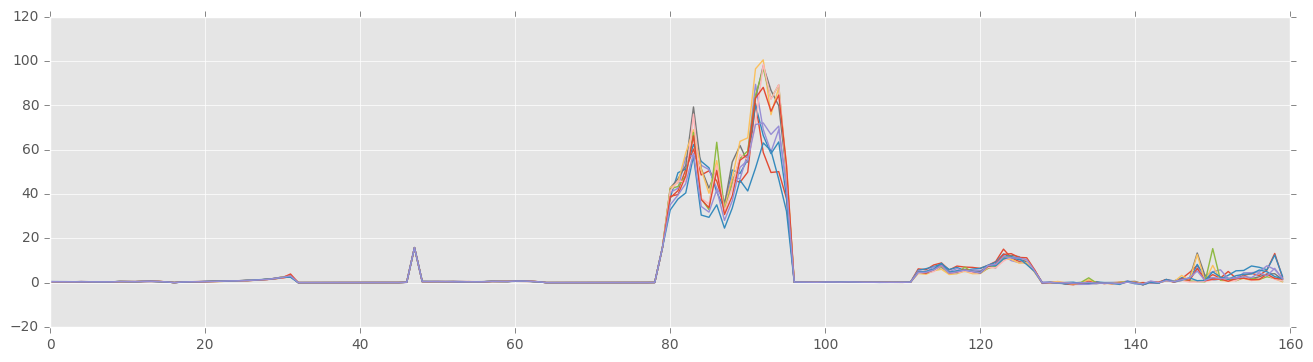

In [58]:
for i in range(10):
    plt.plot(vec[i])

In [25]:
vec_ary = []
for i in range(10): # len(sources1)[:10]
    print(i)
    try:
        vecs = naive.calculate_features(sources1[i]) 
        vec_ary.append(vecs)
    except ValueError:
        print("fail")

0
1
2
3
4
5
6
7
8
9
fail


In [28]:
vec_ary = np.array(vec_ary)
vec_ary.shape

(9, 10, 160)

In [30]:
vec_ary = np.concatenate(vec_ary, axis=0)
vec_ary.shape

(90, 160)

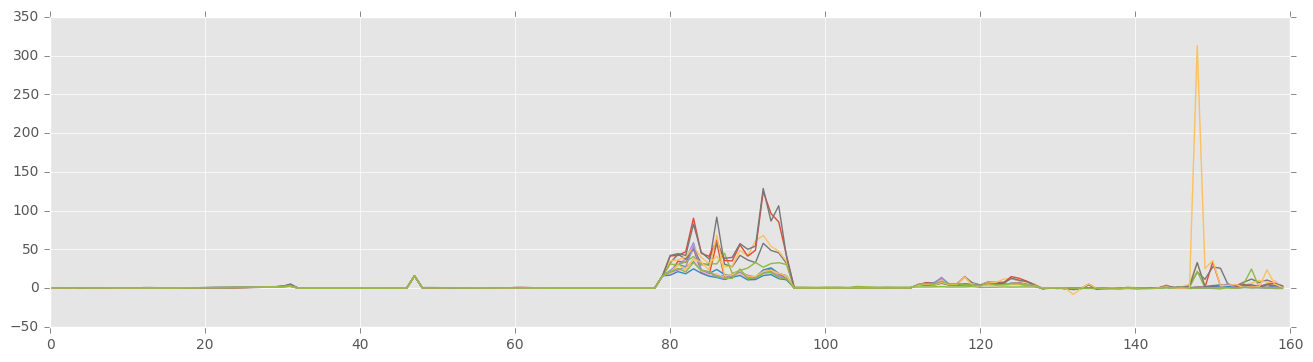

In [59]:
for i in range(0,90, 7):
    plt.plot(vec_ary[i])

In [33]:
# Process the entire set
vec_ary1 = []
for i in range(len(sources1)):
    print(i)
    try:
        vecs = naive.calculate_features(sources1[i]) 
        vec_ary1.append(vecs)
    except ValueError:
        print("fail")

0
1
2
3
4
5
6
7
8
9
fail
10
11
12
13
14
fail
15
16
17
18
19
20
fail
21
22
23
fail
24
25
26
27
28
fail
29
30
31
fail
32
33
34
fail
35
36
37
38
39
40
41
42
43
44
45
46
47
fail
48
49
fail
50
fail
51
52
53
fail
54
55
fail
56
fail
57
58
59
fail
60
fail
61
fail
62
63
64
65
66
67
68
fail
69
70
fail
71
72
73
fail
74
75
76
77
78
79
fail
80
81
fail
82
fail
83
84
85
fail
86
87
88
89
90
fail
91
92
fail
93
94
95
96
97
98
fail
99
100
101
fail
102
103
104
fail
105
fail
106
107
108
109
110
fail
111
112
113
114
115
fail
116
117
118
119
120
fail
121
122
123
124
125
126
127
128
fail
129
130
131
fail
132
fail
133
134
135
136
137
fail
138
139
fail
140
141
142
143
144
145
146
147
148


In [34]:
vec_ary1 = np.concatenate(vec_ary1, axis=0)
vec_ary1.shape

(1120, 160)

In [35]:
np.save('npy_data/naive01_L0',vec_ary1)

In [36]:
vec_ary0 = []
for i in range(len(sources0)):
    print(i, end=' ')
    try:
        vecs = naive.calculate_features(sources0[i]) 
        vec_ary0.append(vecs)
    except ValueError:
        print("fail", end=' ')

0 1 2 3 4 5 fail 6 7 fail 8 

eegkaggle/vectorizers/naive.py:76: RuntimeWarning: invalid value encountered in divide
  D /= D.sum()  # Normalize each channel
eegkaggle/vectorizers/naive.py:152: RuntimeWarning: invalid value encountered in divide
  np.std(epoch, axis=0))
eegkaggle/vectorizers/naive.py:160: RuntimeWarning: invalid value encountered in divide
  np.std(np.diff(epoch, axis=0), axis=0))


9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 fail 26 fail 27 fail 28 29 30 31 32 fail 33 34 35 36 37 38 39 40 41 42 43 fail 44 45 46 47 48 49 50 51 52 53 fail 54 55 56 57 58 59 60 61 62 63 fail 64 65 fail 66 67 68 fail 69 70 71 72 73 74 75 76 77 fail 78 fail 79 80 81 82 83 84 fail 85 86 87 fail 88 89 90 91 fail 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 fail 107 108 109 110 111 112 113 fail 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 fail 143 144 145 146 147 148 149 150 151 152 fail 153 154 155 156 157 158 159 160 161 162 fail 163 164 fail 165 166 167 168 fail 169 170 171 172 173 fail 174 175 fail 176 177 178 179 180 181 182 183 184 fail 185 186 187 188 fail 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 fail 224 225 226 227 fail 228 229 230 231 232 233 234 235 236 237 238 239 fail 240 fail 241 fail 242 243 24

In [38]:
np.save('npy_data/naive01_L1',vec_ary1)

In [41]:
vec_ary0 = np.concatenate(vec_ary0, axis=0)

In [43]:
print(vec_ary0.shape)
np.save('npy_data/naive01_L0',vec_ary0)

(9750, 160)


In [48]:
np.sum(np.isnan(vec_ary1))
vec_ary0 = np.nan_to_num(vec_ary0)

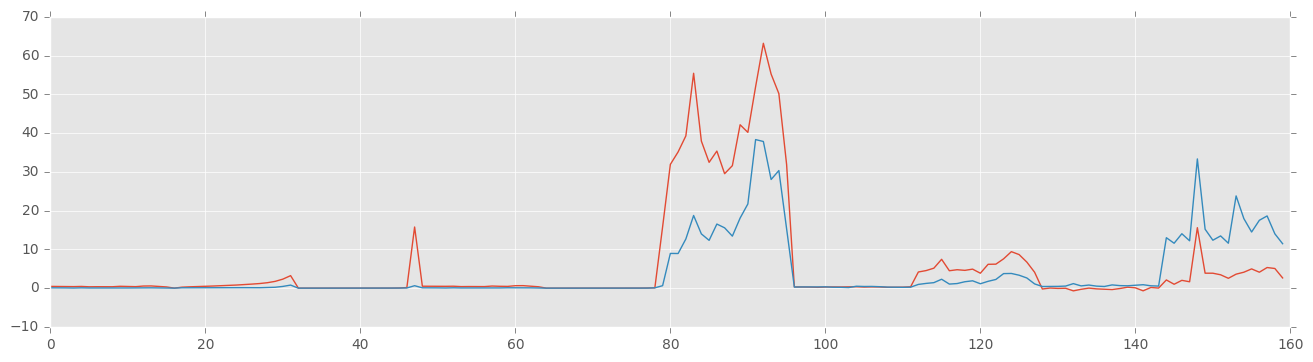

In [70]:
full_set = np.concatenate([vec_ary0, vec_ary1], axis=0)
norm_means = np.mean(full_set, axis = 0)
norm_std = np.std(full_set, axis=0)
norm_means0 = np.mean(vec_ary0, axis = 0)
norm_std0 = np.std(vec_ary0, axis = 0)
norm_means1 = np.mean(vec_ary1, axis = 0)
norm_std1 = np.std(vec_ary1, axis = 0)
plt.plot(norm_means)
plt.plot(norm_std)

In [53]:
normvec0 = (vec_ary0 - norm_means) / norm_std # this fails pretty bad - 0 and 1 sets are way different sizes
normvec1 = (vec_ary1 - norm_means) / norm_std

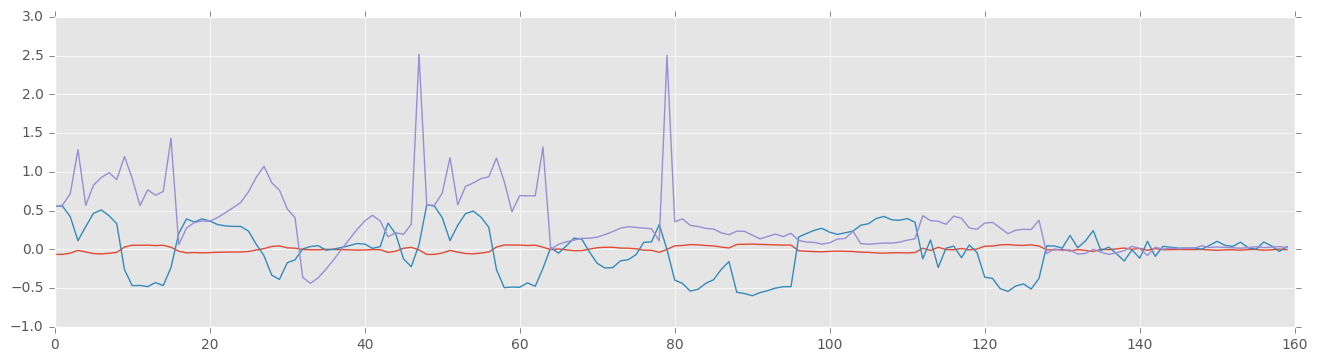

In [61]:
plt.plot(np.mean(normvec0, axis=0))
plt.plot(np.mean(normvec1, axis=0))
plt.plot(norm_means / norm_std /10)

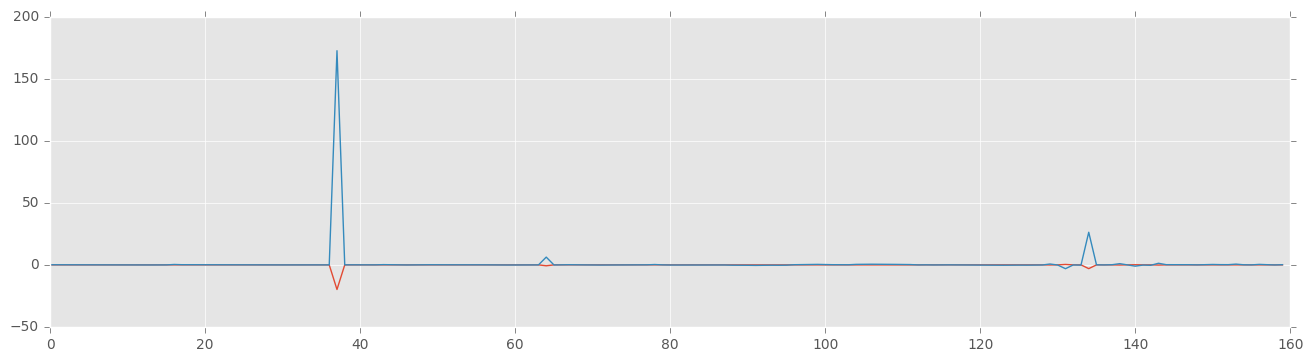

In [65]:
# normalizing this stupid feature vector is going to be a biatch. 

normvec0 = (vec_ary0 - norm_means) / norm_means # this fails pretty bad - 0 and 1 sets are way different sizes
normvec1 = (vec_ary1 - norm_means) / norm_means
plt.plot(np.mean(normvec0, axis=0))
plt.plot(np.mean(normvec1, axis=0))
# plt.plot(norm_means / norm_std /10)

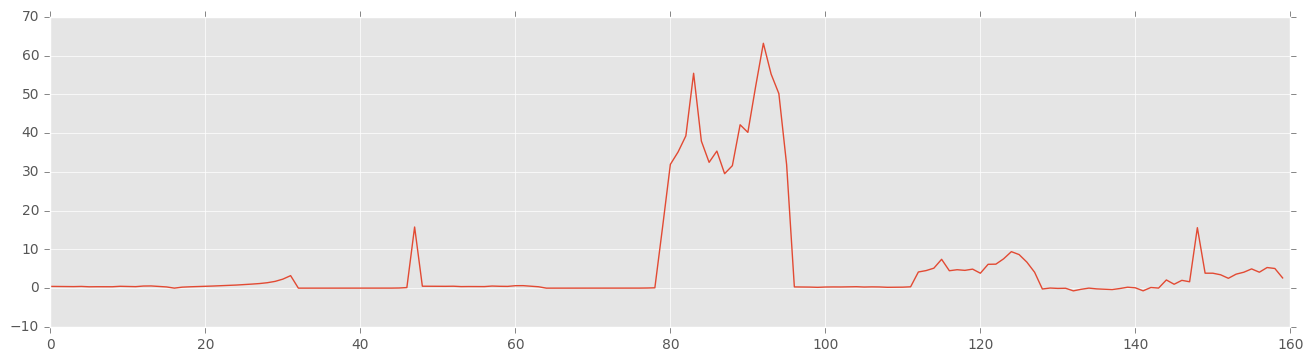

In [66]:
plt.plot(norm_means)

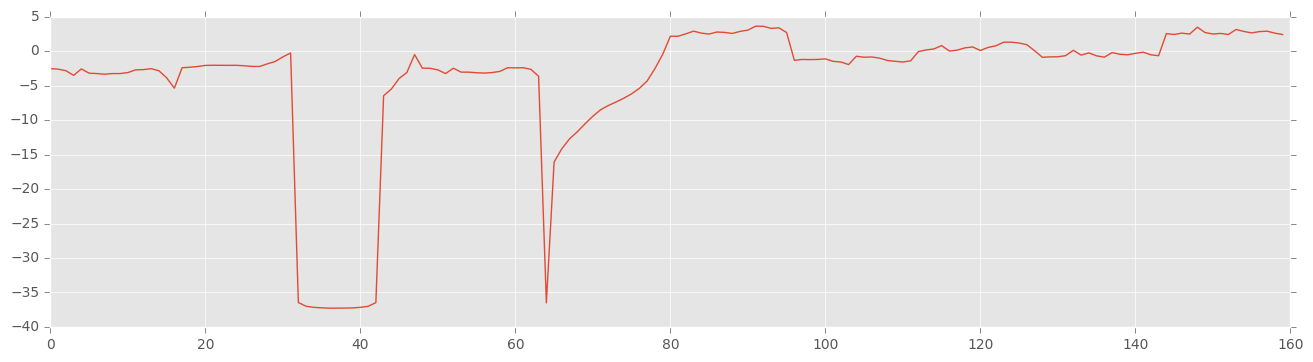

In [68]:
plt.plot(np.log(norm_std))

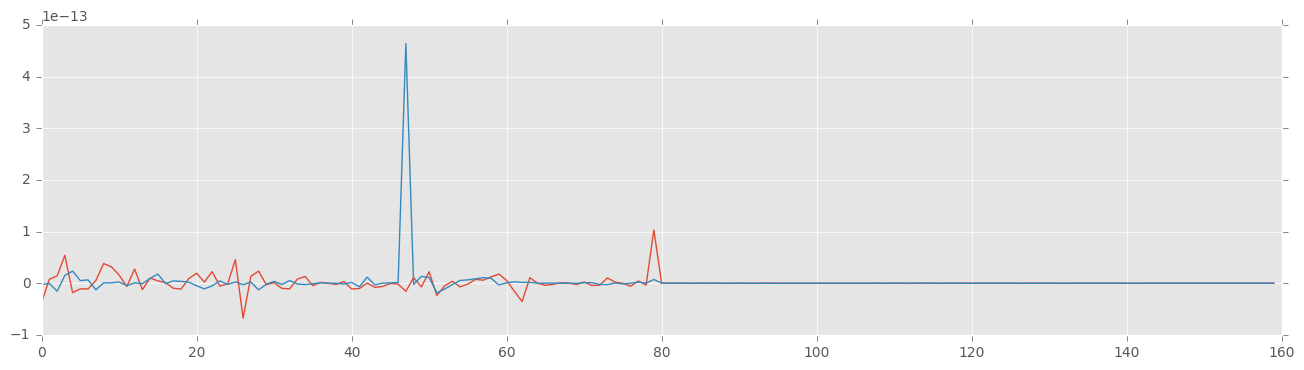

In [71]:
normvec0 = (vec_ary0 - norm_means0) / norm_std0 # this fails pretty bad - 0 and 1 sets are way different sizes
normvec1 = (vec_ary1 - norm_means1) / norm_std1
plt.plot(np.mean(normvec0, axis=0))
plt.plot(np.mean(normvec1, axis=0))